# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Como funciona:

Este método es basado más en densidad que en distancia. DBSCAN intenta formar clusters dependiendo su similitud y no se limita a hacer agrupaciones esféricas ni a obligar a que todos los puntos esten en un cluster, por lo que puede capturar puntos que queden fuera de los cluster y así permite descubrir outliers.

Para cada punto contará los vecinos en un radio eps (radio maximo para la busqueda de vecinos), entonces si tiene un mínimo de casos que cumplen se convierte en un nucleo y los nucleos vecinos se agrupan.

Vamos a utilizar un dataset que no tiene etiquetas.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Estilo del gráfico.

In [ ]:
sns.set(style='whitegrid')

Armado del dataset.

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.6, random_state=42)

Construyamos el pipeline del modelo.

In [ ]:
pipe_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.3, # Radio de vecindad para la densidad
                      min_samples=5)) # Minimo de vecinos para formar un nucleo
])

Procedamos a realizar la predicción. Notemos que aquí como no hay variable objetivo no hay entrenamiento del modelo.

In [ ]:
dbscan_labels = pipe_dbscan.fit_predict(X)

Mostramos las etiquetas predichas por DBSCAN.

In [ ]:
dbscan_labels

array([0, 1, 0, 1, 0, 2, 1, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 3, 1, 1, 3, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 0, 1, 3, 2,
       1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 0, 2, 1, 0, 2, 3, 0, 2, 1, 1, 3, 1,
       3, 3, 3, 3, 1, 3, 2, 1, 2, 0, 2, 2, 1, 0, 3, 0, 0, 1, 0, 3, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 3, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 0, 0, 3, 2, 2, 2, 3, 2, 2, 0, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 1,
       0, 1, 3, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1,
       2, 1, 3, 3, 2, 2, 1, 3, 3, 1, 0, 2, 3, 1, 1, 3, 0, 3, 3, 2, 2, 3,
       1, 1, 2, 3, 1, 1, 2, 0, 0, 3, 3, 0, 3, 2, 1, 3, 0, 1, 2, 2, 3, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 1,
       3, 1, 3, 2, 1, 1, 3, 3, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1, 3, 0, 1, 1,
       1, 0, 1, 1, 3, 1, 2, 3, 3, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 2, 1, 3, 2, 0, 2, 3, 0, 1, 0])

Veamos una métrica para ver que tan bien agrupados están los datos.

In [ ]:
silhouette_score(X, dbscan_labels)

np.float64(0.8080398895422087)

Procedamos a visualizar los cluster generados por el modelo.

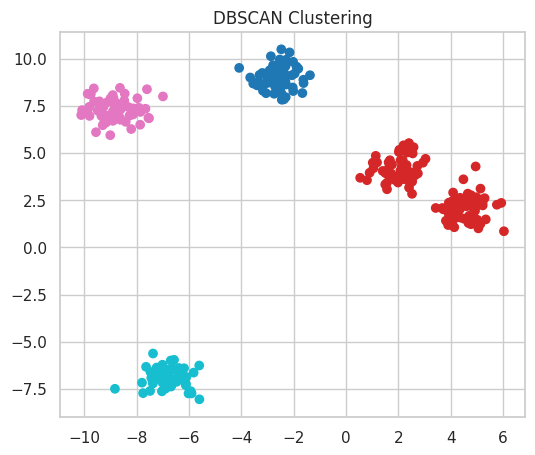

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=dbscan_labels,cmap='tab10')
plt.title('DBSCAN Clustering')
plt.show()

Notemos que en el caso de K-Mean el grupo rojo serian considerados como 2 grupos a parte y ahora en el caso de DBSCAN los consideró suficientemente cercanos para que formaran solo un grupo.

Ahora, en el armado del dataset consideremos 10 centros y repitamos el proceso.

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=10, cluster_std=0.7, random_state=42)

Predicción.

In [ ]:
dbscan_labels = pipe_dbscan.fit_predict(X)

Visualicemos las etiquetas de las clases predichas.

In [ ]:
dbscan_labels

array([ 0,  1,  2,  3,  4,  5,  1,  5,  2,  3,  2,  5,  3,  2,  0,  4,  5,
        1,  0,  4,  0,  2,  0,  4,  2,  1,  1,  5,  5,  2,  3,  4,  2,  0,
        1,  5,  2,  5,  2,  5,  2,  2,  3,  2,  5,  4,  3,  5,  1,  2,  5,
        2,  1,  5,  4,  5,  2,  2,  1,  4,  4,  4,  3,  2,  5,  5,  4,  1,
        2,  2,  0,  1,  2,  3,  2,  3,  1,  2,  4,  2,  2,  2,  2,  2,  5,
        3,  2,  2,  0,  2,  0,  5,  1,  0,  1,  5,  4,  2,  2,  2,  3,  5,
        5,  5,  4,  5,  4,  2,  2,  2,  5,  1,  4,  5,  4,  5,  0,  0,  3,
        4,  0,  3,  2,  2,  3,  4,  2,  5,  0,  0,  2,  2,  3,  5,  4,  3,
        0,  4,  3,  4,  5,  2,  5,  0,  0,  5,  4,  5,  0,  3,  5,  1,  0,
        2,  2,  5,  4,  5,  4,  5,  2,  4,  3,  2,  2,  0,  3,  5,  4,  2,
        5,  4,  1,  2,  2,  4,  5,  1,  3,  2,  4,  2,  1,  5,  2,  2,  5,
        2,  1,  4,  5,  4,  1,  1,  2, -1,  4,  2,  0,  2,  5,  4,  2,  4,
        0,  5,  5,  3,  2,  4,  3,  4,  1,  4,  4,  2,  2,  0,  0,  4,  5,
        0,  2,  4,  2,  2

Notemos que hay una etiqueta que tiene valor -1, así es como DBSCAN nos muestra que datos son etiquetados como outliers.

Lo anterior ocurre cuando no tiene suficientes vecinos, está aislado o en una zona poco densa.

Que hacer con los outliers:

- Aumentar eps : Agrupa más puntos, reduce la cantidad de ruido
- Disminuir min_samples : Hace más fácil formar nucleos y conectar aislados
- Dejar como ruido : Util para deteccion de anomalias o comportamiento atipico

Procedamos a visualizar los cluesteres.

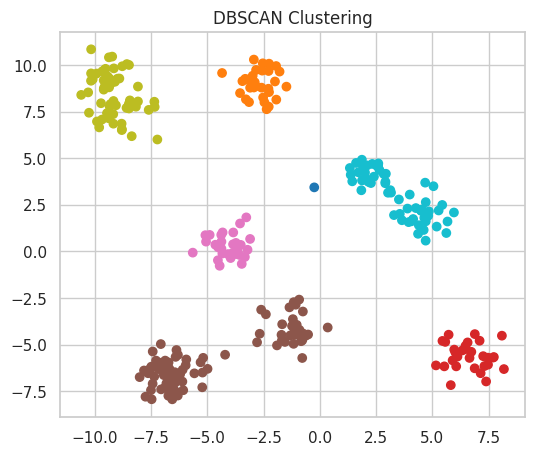

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=dbscan_labels,cmap='tab10')
plt.title('DBSCAN Clustering')
plt.show()

Notemos que en la visualizacion el datos outlier es coloreado de un color diferente al de todos los clusters.